# Time series data and sampling

- Time series data is a sequence of data points collected in consequent time instants.
- Well formed time series data is sampled with regular intervals, and the sampling of all variables is aligned.
- This is not always the case, and irregularities will cause problems, if not treated properly

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from numpy import sin,cos,pi

In [1]:
def unknown_process(t):
    N=3
    A=np.array((1,2,3)) # Amplitude
    f=np.array((1,5,3)) # Frequencies
    phase=np.array((0, 0.1, 0.3))*pi # Initial phase

    # Intialize the output with zeros
    output=np.zeros(len(t))

    # The output will be the superposition of N signals
    for i in range(N):
        output=output+A[i]*sin(2*pi*f[i]*t+phase[i])
    return output

## Regular sampled data 

In [41]:
N=50
t=np.linspace(0,1,N)

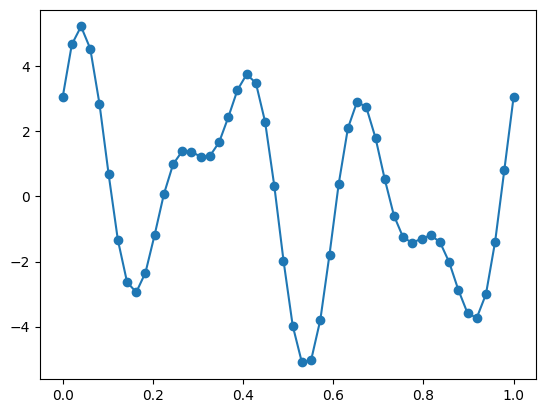

In [ ]:
x=unknown_process(t)
plt.plot(t,x)
plt.scatter(t,x)

<StemContainer object of 3 artists>

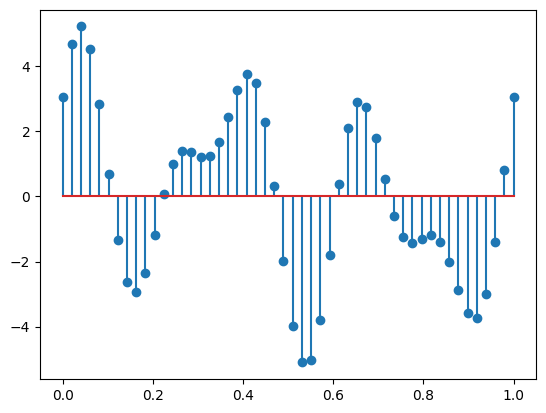

In [4]:
plt.stem(t,x)

##  Missing values

In [42]:
# Random index of values to be deleted
R=10
ir=np.round(np.random.rand(R)*len(t)).astype(int)
ir

array([28, 12,  4,  4, 29, 22, 16, 47, 14, 16])

Text(0.5, 1.0, 'Regularly sampled signal with missing values')

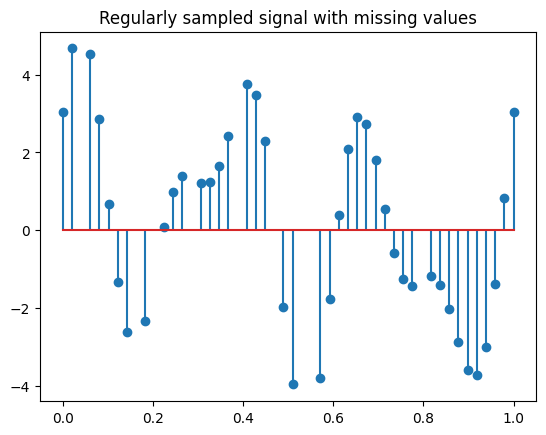

In [ ]:
# Delete the selected values from both t and x
tr=np.delete(t, ir)
xr=np.delete(x, ir)
plt.stem(tr,xr)
plt.title('Regularly sampled signal with missing values')

## Sampling jitter

- Jitter is the deviation from true periodicity of a presumably periodic signal.
- For various reasons the sampling clock may be unstable, causing jitter to the sample collection

Text(0.5, 1.0, 'Jitter in sampling clock')

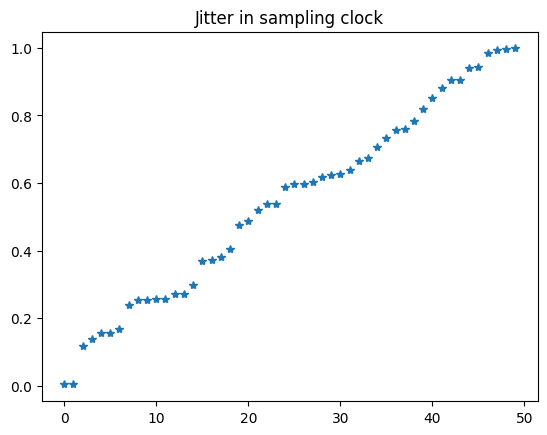

In [6]:
tj=np.sort(np.random.rand(N)*max(t))
plt.plot(np.sort(np.random.rand(N)*max(t)), '*')
plt.title('Jitter in sampling clock')

Text(0.5, 1.0, 'Data with Jitter')

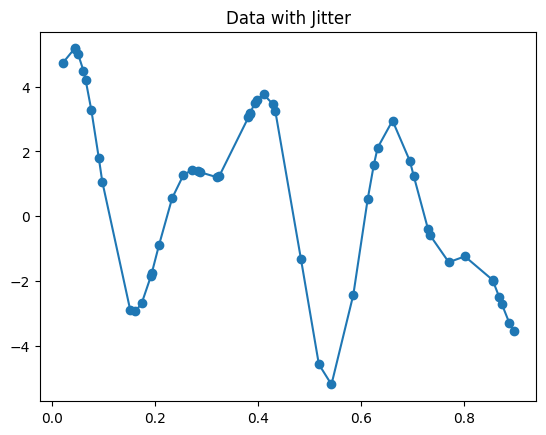

In [54]:
# Read the data with irregular intervals
xj=unknown_process(tj)
plt.plot(tj,xj)
plt.scatter(tj,xj)
plt.title('Data with Jitter')

Text(0.5, 1.0, 'Data with Jitter')

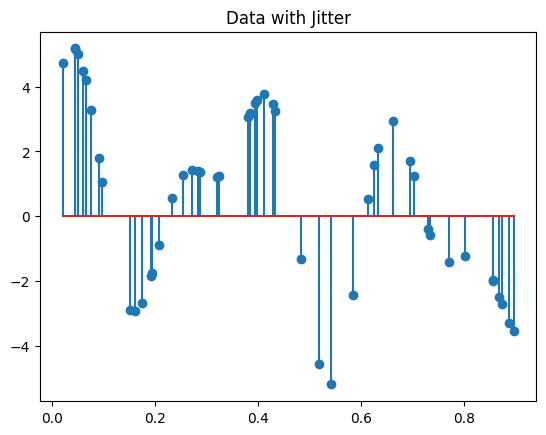

In [55]:
plt.stem(tj,xj)
plt.title('Data with Jitter')

## How to fix jitter and missing values before using the data

- One standard method is to apply a function to the data, and then resample the function at regular intervals
- Often the applied function is a polynomial, such as Spline
- A spline is a function defined piecewise by polynomials. In interpolating problems, spline interpolation is often preferred to polynomial interpolation because it yields similar results, even when using low degree polynomials / [Wikipedia](https://en.wikipedia.org/wiki/Spline_(mathematics))

**Pro TIP**: If you want to get help for a function, for example `make_interp_spline`, press Shift-TAB after the function name, and you get a help window about the usage of the funciton.

In [56]:
from scipy.interpolate import make_interp_spline

In [51]:
#The order of the spline polynomia
P=3

# Original data
fo=make_interp_spline(t,x, k=P)

# Data with some samples miossing
fr=make_interp_spline(tr,xr, k=P)
fj=make_interp_spline(tj,xj, k=P)

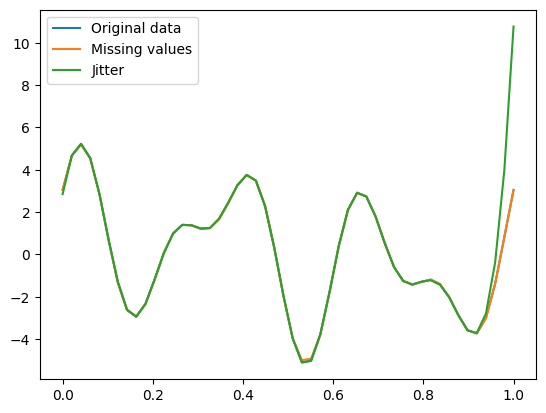

In [58]:
plt.plot(t,fo(t), label='Original data')
plt.plot(t,fr(t), label='Missing values')
plt.plot(t,fj(t), label='Jitter')
plt.legend()

<StemContainer object of 3 artists>

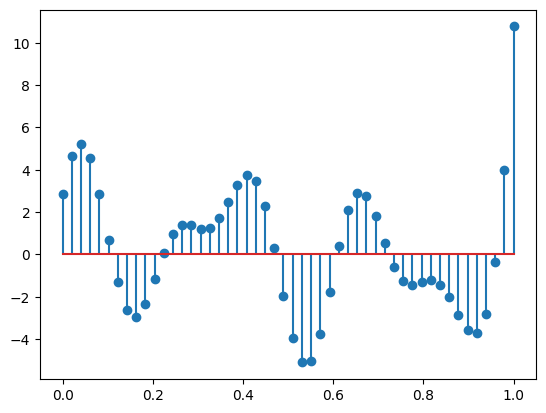

In [59]:
# Resample evenly
plt.stem(t, fj(t))